<a href="https://colab.research.google.com/github/tykimos/tykimos.github.io/blob/master/mnist_val_training_monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

###
x_val = x_train[50000:60000] # 10000 개
y_val = y_train[50000:60000] # 10000 개
x_train = x_train[:50000]
y_train = y_train[:50000]
###

x_train = x_train.reshape(50000, 784).astype('float32') / 255.0
x_val = x_val.reshape(10000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))

# 5. 학습과정 살펴보기
print('## training loss and accuracy ##')
print(hist.history['loss'])
print(hist.history['accuracy'])
print(hist.history['val_loss'])
print(hist.history['val_accuracy'])

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 2s 48us/step - loss: 0.7576 - accuracy: 0.8041 - val_loss: 0.3753 - val_accuracy: 0.9018
Epoch 2/200
50000/50000 [==============================] - 2s 47us/step - loss: 0.3659 - accuracy: 0.8993 - val_loss: 0.3051 - val_accuracy: 0.9180
Epoch 3/200
50000/50000 [==============================] - 2s 47us/step - loss: 0.3143 - accuracy: 0.9116 - val_loss: 0.2745 - val_accuracy: 0.9229
Epoch 4/200
50000/50000 [==============================] - 2s 47us/step - loss: 0.2848 - accuracy: 0.9200 - val_loss: 0.2535 - val_accuracy: 0.9305
Epoch 5/200
50000/50000 [==============================] - 2s 48us/step - loss: 0.2627 - accuracy: 0.9265 - val_loss: 0.2375 - val_accuracy: 0.9355
Epoch 6/200
50000/50000 [==============================] - 2s 48us/step - loss: 0.2446 - accuracy: 0.9317 - val_loss: 0.2226 - val_accuracy: 0.9408
Epoch 7/200
50000/50000 [==============================] - 2s 

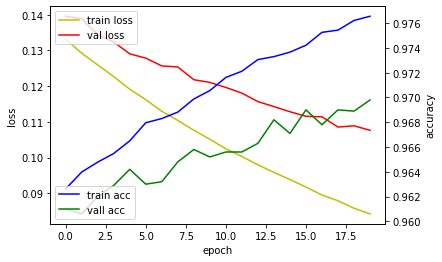

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='vall acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [14]:
hist = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 47us/step - loss: 0.1331 - accuracy: 0.9626 - val_loss: 0.1396 - val_accuracy: 0.9610
Epoch 2/20
50000/50000 [==============================] - 2s 49us/step - loss: 0.1293 - accuracy: 0.9640 - val_loss: 0.1389 - val_accuracy: 0.9606
Epoch 3/20
50000/50000 [==============================] - 2s 47us/step - loss: 0.1260 - accuracy: 0.9648 - val_loss: 0.1344 - val_accuracy: 0.9620
Epoch 4/20
50000/50000 [==============================] - 2s 46us/step - loss: 0.1227 - accuracy: 0.9655 - val_loss: 0.1324 - val_accuracy: 0.9629
Epoch 5/20
50000/50000 [==============================] - 2s 50us/step - loss: 0.1191 - accuracy: 0.9665 - val_loss: 0.1291 - val_accuracy: 0.9642
Epoch 6/20
50000/50000 [==============================] - 2s 49us/step - loss: 0.1162 - accuracy: 0.9680 - val_loss: 0.1279 - val_accuracy: 0.9630
Epoch 7/20
50000/50000 [==============================] - 2s 48us/st